In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chisquare

Correlation coefficient: 0.501
P-value: 3.521e-03


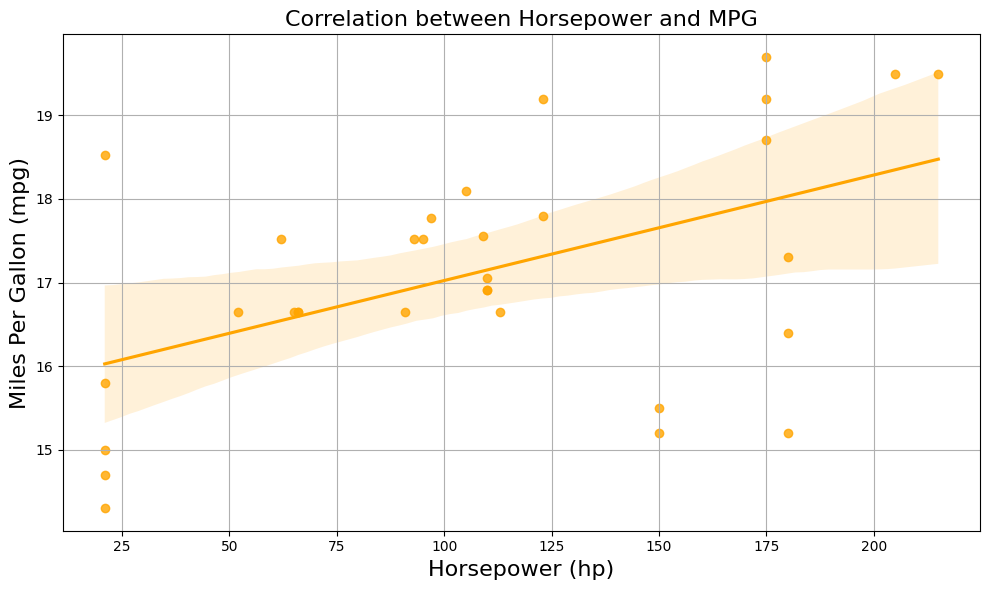

In [9]:
#Analyze the given dataset

# Load CSV file
df = pd.read_csv("mtcars_manipulated.csv")  # Replace with your actual CSV filename

# Extract variables
x = df['hp']
y = df['mpg']

# Compute Pearson correlation and p-value
corr_coeff, p_value = pearsonr(x, y)
print(f"Correlation coefficient: {corr_coeff:.3f}")
print(f"P-value: {p_value:.3e}")

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, scatter_kws={'color': 'orange'}, line_kws={'color': 'orange'})
plt.title("Correlation between Horsepower and MPG", fontsize=16)
plt.xlabel("Horsepower (hp)", fontsize=16)
plt.ylabel("Miles Per Gallon (mpg)", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Function to extract first digit
def extract_first_digit(series):
    def first_digit(x):
        try:
            x = abs(float(x))
            while x >= 10:
                x //= 10
            while x < 1 and x != 0:
                x *= 10
            return int(str(x)[0])
        except:
            return np.nan
    return series.dropna().apply(first_digit)

# Benford expected distribution
def benford_expected_distribution():
    return np.array([math.log10(1 + 1/d) for d in range(1, 10)])

# Function to perform Benford analysis
def perform_benford_test(series, label):
    first_digits = extract_first_digit(series)
    observed_counts = first_digits.value_counts().sort_index()
    observed = observed_counts.reindex(range(1, 10), fill_value=0).values
    expected = benford_expected_distribution() * observed.sum()

    # Chi-square and p-value
    chi2, p = chisquare(f_obs=observed, f_exp=expected)
    
    # Plotting
    plt.figure(figsize=(5, 3))
    plt.bar(range(1, 10), observed / observed.sum(), alpha=0.6, label="Observed", color='orange')
    plt.plot(range(1, 10), benford_expected_distribution(), 'ro-', label="Benford")
    plt.title(f"Benford Analysis: {label}")
    plt.xlabel("Leading Digit")
    plt.ylabel("Frequency")
    plt.xticks(range(1, 10))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(f"--- {label.upper()} ---")
    print(f"Chi-square = {chi2:.4f}, p-value = {p:.15f}\n")
    return chi2, p


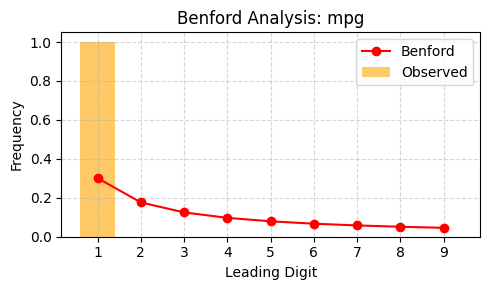

--- MPG ---
Chi-square = 74.3017, p-value = 0.000000000000681

classified as: Benford Anomaly and Extrem


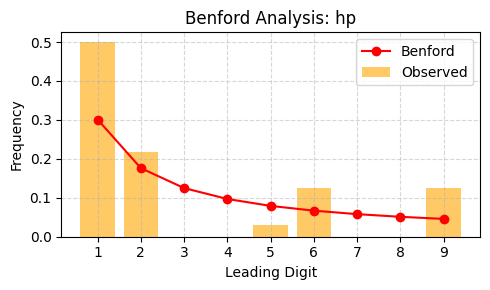

--- HP ---
Chi-square = 22.0617, p-value = 0.004802923224322

classified as: Acceptable


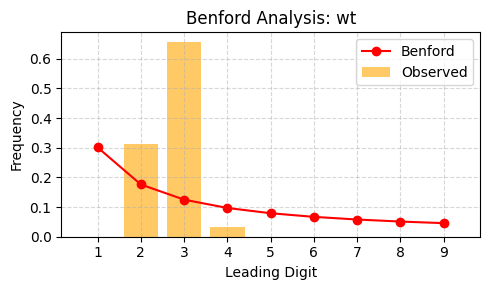

--- WT ---
Chi-square = 96.3730, p-value = 0.000000000000000

classified as: Benford Anomaly and Extrem


In [11]:
# Apply Benford's law to specific columns
columns_to_check = ['mpg', 'hp','wt']  # Modify as needed
results = {}

for col in columns_to_check:
    if col in df.columns:
        chi2, p = perform_benford_test(df[col], col)
        results[col] = {'chi2': chi2, 'p-value': p}
    else:
        print(f"Column '{col}' not found in dataset.")
    #Determine manipulated and extreme variable
    if chi2 > 30.58 and p < 0.0001:
        classification = "Benford Anomaly and Extrem"
    else:
        classification = "Acceptable"

    print(f"classified as: {classification}")